In [1]:
!pip install -Uq lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import torch
import lightning as L


import os

import torchvision
import torch.nn.functional as F
import torchmetrics
from lightning.pytorch.loggers import CSVLogger
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset,random_split,DataLoader
from torchvision import datasets



In [ ]:
train_data = datasets.MNIST(root='data',train=True, download=True, transform=torchvision.transforms.ToTensor(),)

100%|██████████| 9912422/9912422 [00:00<00:00, 101508901.24it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29000644.92it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28717020.78it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6045867.59it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
np.shape(train_data.data)

torch.Size([60000, 28, 28])

In [ ]:
test_data = datasets.MNIST(root='data',train=False, download=True, transform=torchvision.transforms.ToTensor())

In [ ]:
train_data, val_data = random_split(train_data, [55000,5000])

In [ ]:
train_loader = DataLoader(train_data, batch_size=64)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

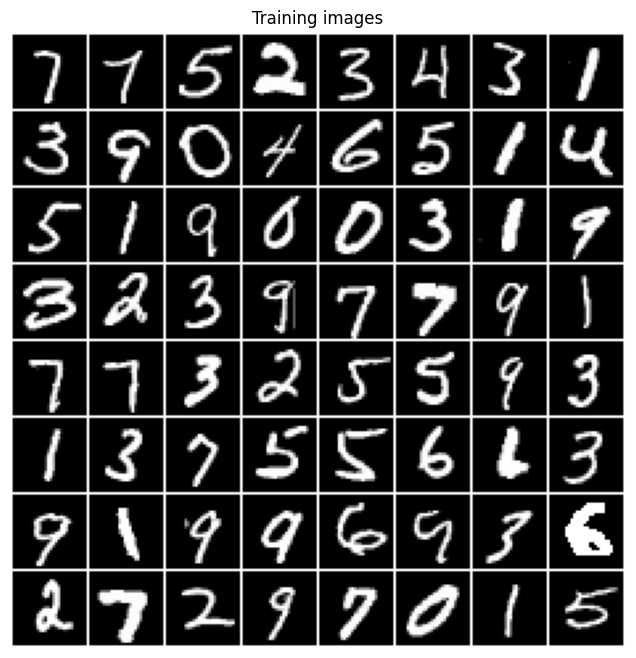

In [ ]:
for images, labels in train_loader:
  break

plt.figure(figsize= (8,8))
plt.axis('off')
plt.title('Training images')
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64],
    padding=1,
    pad_value=3,
    normalize=False),
    (1,2,0)
))

In [31]:
# If we do the same using pytorch lightning
# It becomes very convenient

class MnistDataModule(L.LightningDataModule):
  def __init__(self, data_path:str="./", batch_size = 64, num_workers=0):
    super().__init__()
    self.data_path = data_path,
    self.batch_size = batch_size,
    self.num_workers = num_workers

  def prepare_data(self):
    datasets.MNIST(root = str(self.data_path),download=True)

  def setup(self, stage=None):
    train = datasets.MNIST(
        root=  str(self.data_path),
        train= True,
        transform = torchvision.transforms.ToTensor(),
        download = False
    )

    test = datasets.MNIST(
        root = str(self.data_path),
        train = False,
        transform = torchvision.transforms.ToTensor(),
        download = False,
    )

    self.train, self.val = random_split(train, lengths=[55000,5000])

  def train_dataloader(self):
      return DataLoader(dataset=self.train, batch_size = 64, drop_last=True,shuffle=True,num_workers=self.num_workers)

  def val_dataloader(self):
      return DataLoader(dataset = self.val, batch_size = 64, drop_last=False, shuffle=False, num_workers=self.num_workers)

  def test_dataloader(self):
      return DataLoader(dataset = self.test, batch_size = 64, drop_last=False, shuffle=False, num_workers=self.num_workers)



In [32]:
# Now setup and prepare the data in one step

L.pytorch.seed_everything(334)

dm = MnistDataModule()
dm.prepare_data()
dm.setup()

INFO: Global seed set to 334
INFO:lightning.fabric.utilities.seed:Global seed set to 334


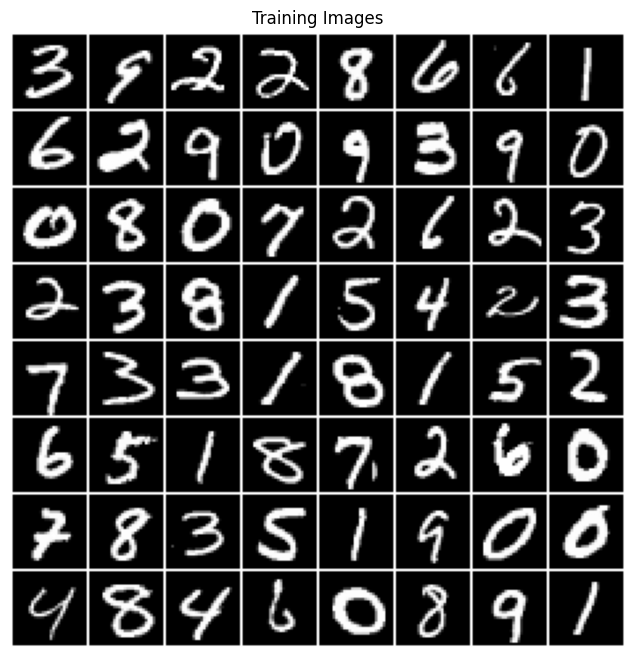

In [33]:
for images, labels in  dm.train_dataloader():
  break

plt.figure(figsize=(8,8))
plt.axis('off')
plt.title('Training Images')
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64],
    padding=1,
    pad_value=1.0,
    normalize=True),
    (1,2,0)
))

In [20]:
## Generic pytorch MLP

In [21]:
class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()

        self.all_layers = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Linear(num_features, 100),
            torch.nn.BatchNorm1d(100),
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(100, 50),
            torch.nn.BatchNorm1d(50),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(50, num_classes),
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        logits = self.all_layers(x)
        return logits

In [24]:
class PyTorchCNN(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.cnn_layers = torch.nn.Sequential(

            torch.nn.Conv2d(1, 3, kernel_size=5),
            torch.nn.BatchNorm2d(3),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),

            torch.nn.Conv2d(3, 16, kernel_size=3),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),

            torch.nn.Conv2d(16, 32, kernel_size=3),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
        )

        self.fc_layers = torch.nn.Sequential(
            # hidden layer
            torch.nn.Linear(32, 20),
            torch.nn.BatchNorm1d(20),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(20, num_classes)
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        # print(x.shape)
        x = torch.flatten(x, start_dim=1)
        logits = self.fc_layers(x)
        return logits

Define the Lightning Model

In [27]:
class LightningModel(L.LightningModule):
  def __init__(self, model, learning_rate):
    super().__init__()
    self.model = model
    self.learning_rate = learning_rate

    self.save_hyperparameters(ignore=['model'])

    self.train_acc = torchmetrics.Accuracy(task = 'multiclass', num_classes=10)
    self.val_acc = torchmetrics.Accuracy(task = 'multiclass', num_classes=10)
    self.test_acc = torchmetrics.Accuracy(task = 'multiclass', num_classes=10)

  def forward(self, x):
    return self.model(x)

  def _shared_step(self, batch):
    features, true_labels = batch
    logits = self(features)

    loss = F.cross_entropy(logits, true_labels)
    predicted_labels = torch.argmax(logits, dim=1)
    return loss, true_labels, predicted_labels


  def training_step(self, batch, batch_idx):
    loss, true_labels, predicted_labels = self._shared_step(batch)

    self.log('train_loss', loss)
    self.train_acc(predicted_labels, true_labels)
    self.log('train_acc', self.train_acc, prog_bar=True, on_epoch=True, on_step=False)

  def validation_step(self, batch, batch_idx):
    loss, true_labels, predicted_labels = self._shared_step(batch)

    self.log('val_loss', loss)
    self.val_acc(predicted_labels, true_labels)
    self.log('val_acc', self.val_acc, prog_bar=True, on_epoch=True, on_step=True)

  def test_step(self, batch, batch_idx):
    loss, true_labels, predicted_labels = self._shared_step(batch)

    self.test_acc(predicted_labels, true_labels)
    self.log('test_acc', self.test_acc)

  def configure_optimizers(self):
    optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate)
    return optimizer

In [34]:
L.seed_everything(33)
dm = MnistDataModule()

generic_model = PyTorchMLP(num_features=28*28,num_classes=10)
lightning_model = LightningModel(model=generic_model,learning_rate = 0.1)

INFO: Global seed set to 33
INFO:lightning.fabric.utilities.seed:Global seed set to 33


In [35]:
trainer = L.Trainer(
    max_epochs=20,
    accelerator='cpu',
    devices='auto',
    logger=CSVLogger(save_dir="logs/", name='my-model'),
    deterministic=True
)

INFO: GPU available: True (cuda), used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


In [36]:
trainer.fit(model=lightning_model, datamodule=dm)

INFO: 
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 84.4 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
84.4 K    Trainable params
0         Non-trainable params
84.4 K    Total params
0.337     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 84.4 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
84.4 K    Trainable params
0         Non-trainable params
84.4 K    Total params
0.337     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/optimization/automatic.py:131: UserWarning: `training_step` returned `None`. If this was on purpose, ignore this warning...
  self.warning_cache.warn("`training_step` returned `None`. If this was on purpose, ignore this warning...")


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [1]:
trainer

NameError: ignored